# K MEANS

Agregando las librerías necesarias.

In [49]:
import numpy as np, imageio as imio, matplotlib.pyplot as plt, seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder

In [50]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

In [51]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array, allow_pickle = True)
training_set_dict['label'] = np.load(training_image_labels_array, allow_pickle = True)
training_set_dict['features'] = np.load(images_inception_features, allow_pickle = True)

In [52]:
## Cargamos las features y las labels de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [53]:
features.shape

(10222, 2048)

## Normalizando la data

In [54]:
norm_features = (features - features.min())/(features.max() - features.min())

## PCA

In [55]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(norm_features)
features_2D = principalComponents

In [56]:
norm_features.shape

(10222, 2048)

In [57]:
features_2D.shape

(10222, 2)

Text(0, 0.5, 'component 2')

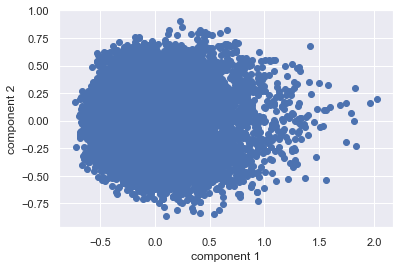

In [58]:
plt.scatter(features_2D[:, 0], features_2D[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')

In [59]:
labelencoder = LabelEncoder()
color = labelencoder.fit_transform(labels)

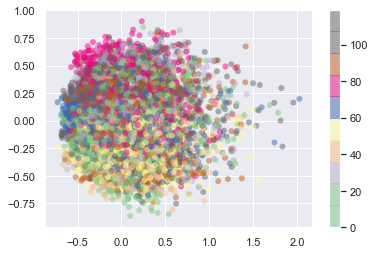

In [60]:
plt.scatter(features_2D[:, 0], features_2D[:, 1],
            c=color, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar()

## Kmeans

In [61]:
# Función para entrenar el modelo
def k_m(data_x, n, color):
    kmeans = KMeans(n_clusters=n, random_state = 0).fit(data_x)
    clusters = kmeans.predict(data_x)
    centers = kmeans.cluster_centers_
    plt.scatter(data_x[:, 0], data_x[:, 1],
            c=color, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    return(clusters)

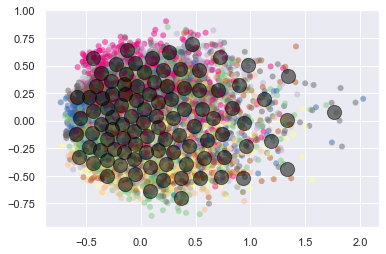

In [62]:
clusters = k_m(features_2D, 100, color)

## Comparación data normalizada

Se toma de referencia la raza husky siberiano y se busca encontrar razas similares que se agrupen en la misma categoría tomando en cuenta la categoría que se asignó.

***
Se busca primero los indices en los que aparece "siberian_husky"

In [63]:
#similar = np.where((labels == "samoyed")|(labels == "siberian_husky"))
similar = np.where(labels == "siberian_husky")

In [64]:
valores, contador = np.unique(clusters[similar], return_counts=True)
print("Valores: "+str(valores))
print("Conteo: "+str(contador))

Valores: [ 0  1  8 12 14 19 20 22 34 37 39 41 42 46 49 52 57 62 65 67 73 79 80 84
 85 87 88 89 98]
Conteo: [ 2  1  4  7  6  1  2  2  1  4  1  3  8  5  4  2  1  1  1 12  5  1  3  2
  3  1  6  1  5]


In [65]:
valores[np.argmax(contador)]

67

Se puede apreciar que la categoría predominante es la 67.

***
Otra raza similar es el malute por lo que ahora se encontrará cúal es la categoría predominante

In [66]:
similar = np.where((labels == "malamute")|(labels == "siberian_husky"))

In [67]:
valores, contador = np.unique(clusters[similar], return_counts=True)
print("Valores: "+str(valores))
print("Conteo: "+str(contador))

Valores: [ 0  1  6  8 12 14 18 19 20 22 34 37 39 41 42 43 46 49 52 54 57 62 65 67
 73 79 80 84 85 87 88 89 94 98]
Conteo: [ 6  1  2  6 14 14  1  1  2  3  4 15  1  3 17  2  8  6  3  1  1  2  3 18
  6  1  4  2  4  1  7  1  1 15]


In [68]:
valores[np.argmax(contador)]

67

De nuevo la categoría predominante es igual que en los casos anteriores

***
Por último se incluirá al samoyedo que también comparten caracteristicas.

In [69]:
similar = np.where((labels == "malamute")|(labels == "siberian_husky")|(labels == "samoyed"))

In [70]:
valores, contador = np.unique(clusters[similar], return_counts=True)
print("Valores: "+str(valores))
print("Conteo: "+str(contador))

Valores: [ 0  1  2  6  8 12 14 18 19 20 21 22 26 29 33 34 37 39 41 42 43 46 49 52
 54 57 60 62 65 67 71 73 74 79 80 84 85 87 88 89 94 97 98]
Conteo: [ 6  2  6  2  6 17 15  5  1  2  1  3  2  1  1 14 15  7  3 18  5  8  8 18
  1  1  2  3  3 25  1  9  6 13  6  2  9  6 10  1  1  4 16]


In [71]:
valores[np.argmax(contador)]

67

## Comparacón data sin normalizar

Se hará la misma prueba anterior solo que esta vez la data estará sin normalizar.
Se realiza PCA para la data sin normalizar:

In [72]:
pca_features = features
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(pca_features)
pca_features = principalComponents

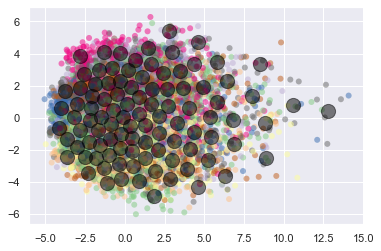

In [73]:
clusters = k_m(pca_features, 100, color)

A simple vista se puede apreciar que es muy similar al caso de la data normalizada con pequeñas variaciones en los grupos encontrados.

In [74]:
similar = np.where(labels == "siberian_husky")
valores, contador = np.unique(clusters[similar], return_counts=True)
print("Valores: "+str(valores))
print("Conteo: "+str(contador))
valores[np.argmax(contador)]

Valores: [ 0  1  9 12 15 24 26 33 35 37 40 41 46 48 50 52 53 55 56 71 74 79 80 86
 87 88 89 90 92 95]
Conteo: [10  6  2  4  3  1  5  2  1  3  3  1  1  2  2  7  7  3  1  1  8  1  1  1
  1  4  2  3  2  7]


0

In [75]:
similar = np.where((labels == "malamute")|(labels == "siberian_husky"))
valores, contador = np.unique(clusters[similar], return_counts=True)
print("Valores: "+str(valores))
print("Conteo: "+str(contador))
valores[np.argmax(contador)]

Valores: [ 0  1  7  9 12 15 20 21 24 26 33 35 37 40 41 46 48 49 50 52 53 55 56 58
 68 71 74 79 80 86 87 88 89 90 92 95]
Conteo: [18  7  1  2 13  5  1  1  2  8  2  1 11  3  6  1  2  2  2  9 12  5  3  1
  1  2 22  1  1  1  1  9  2  3  3 12]


74

In [76]:
similar = np.where((labels == "malamute")|(labels == "siberian_husky")|(labels == "samoyed"))
valores, contador = np.unique(clusters[similar], return_counts=True)
print("Valores: "+str(valores))
print("Conteo: "+str(contador))
valores[np.argmax(contador)]

Valores: [ 0  1  3  7  8  9 12 15 20 21 24 25 26 33 35 36 37 40 41 42 43 46 47 48
 49 50 52 53 55 56 58 68 69 71 72 74 79 80 86 87 88 89 90 92 95]
Conteo: [19 10  1  1  2  2 14  7  2  9  3  2  9  6 11  1 11  3  7  2  3  1  1  2
  5  2 21 23  5  3  1  1  1  3 10 22  1  9  5 10 11  2  3  5 13]


53

Se puede apreciar que la agrupación de grupos no la realizó de forma correcta, variando los resultados del grupo en cada experimento.

### Conclusión

* Mientras más se acerque al número real de catégorias la predicción mejora considerablemente, en el caso del número de grupos se hizo una aproximación conociendo la cantidad real de razas de perros.
* El grupo que se asigna varia dependiendo del valor de random_state, esto debido a que random_state es un parametro para que cada experimento pueda ser reproducible en otros notebooks o correrlo de nuevo todo el código produciendo el mismo resultado.
* Normalizar la data es un requisito para trabajar con el algoritmo de KMeans, de lo contrario no asigna de forma adecuada las clasificaciones.